# Dataset Path give with Kaggle user name and api

In [ ]:
import os
import zipfile

# Set your Kaggle username and API key
username = "duvinduchamod"
api_key = "10a4445cc8d0f2da09b1198be72a2ba7"

# Set your desired directory for downloading the dataset
download_dir = r"C:\Users\GL63 8RCS\Desktop\poochPaw\DogAge\PetFinder_All\PetFinder_All"
# Create the directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Set Kaggle environment variables
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = api_key

# Use the Kaggle API command to download the dataset
!kaggle datasets download -d user164919/the-dogage-dataset -p {download_dir}

# Unzip the downloaded file if necessary
with zipfile.ZipFile(os.path.join(download_dir, "the-dogage-dataset.zip"), 'r') as zip_ref:
    zip_ref.extractall(download_dir)

# Check the contents of the directory
print(os.listdir(download_dir))


## Label encode young and senior dogs images 

In [20]:
import os
import numpy as np

data_path = r"C:\Users\GL63 8RCS\Desktop\poochPaw\DogAge\PetFinder_All\PetFinder_All"
# Get all folder names (categories) in the data path
categories = os.listdir(data_path)
print("Categories:", categories)

# Generate labels as integers
labels = np.arange(len(categories))
print("Labels:", labels)

# Create a dictionary mapping categories to labels
label_dict = dict(zip(categories, labels))
print("Label Dictionary:", label_dict)


Categories: ['Senior', 'Young']
Labels: [0 1]
Label Dictionary: {'Senior': 0, 'Young': 1}


# Preprocess Dog Images

In [21]:
import cv2
import os
import numpy as np

img_size = 50

data = []
target = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
        
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)  # full path for all images
        img = cv2.imread(img_path)  # load all images in path
        
        try:
            if img is None:
                raise Exception("Image is empty")
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converting the image into gray scale
            resized = cv2.resize(gray, (img_size, img_size))  # resizing the gray scale image
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print(f"Error processing image {img_path}: {str(e)}")
            continue

# Convert lists to numpy arrays
data = np.array(data)
target = np.array(target)

print("Data shape:", data.shape)
print("Target shape:", target.shape)


Data shape: (11107, 50, 50)
Target shape: (11107,)


#  Count Young and senior dog images

In [22]:


# Count the number of samples in each category
num_samples_per_class = {}
for category in categories:
    folder_path = os.path.join(data_path, category)
    num_samples_per_class[category] = len(os.listdir(folder_path))

print("Number of samples per class:", num_samples_per_class)

# Calculate class weights
total_samples = sum(num_samples_per_class.values())
class_weights = {}
for category, num_samples in num_samples_per_class.items():
    class_weights[label_dict[category]] = total_samples / (len(categories) * num_samples)

print("Class weights:", class_weights)


Number of samples per class: {'Senior': 2261, 'Young': 8846}
Class weights: {0: 2.4562140645731976, 1: 0.6277978747456477}


In [23]:
print(data.shape,target.shape)

(11107, 50, 50) (11107,)


In [24]:
import numpy as np

data=np.array(data)
target=np.array(target)

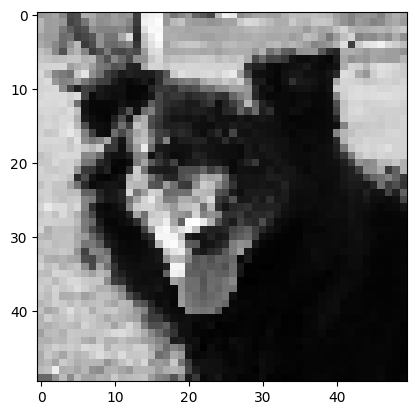

In [25]:
from matplotlib import pyplot as plt
plt.imshow(data[500],cmap='gray')

# Converting image pixel values 0 to 1

In [27]:
data_new=data/255.0 #image normalizing krnwa.
#pixel value 0-255 athra tyna nisa 255n bednwa. 0 and 1 athrata enwa.
#neural netowrk ekt normalize krla danna oni nisa.
#ehm nathnm loss eka godak wedi
data_new=np.reshape(data_new,(data_new.shape[0],img_size,img_size,1))
print(data_new.shape)
#2d cnn design krla tynne color images walata.api gray yawanakota 1 manually dala yawanna oni.
#1n kynne api eka chenel ekk tyna image ewanwa


(11107, 50, 50, 1)


In [28]:
from keras.utils import to_categorical

# Assuming 'target' is your integer-encoded categorical variable
target_new = to_categorical(target)

In [29]:
import numpy as np

np.save('data',data_new)
np.save('target',target_new)

In [30]:
target_new.shape

(11107, 2)

In [31]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code
print(data.shape , target.shape)

(11107, 50, 50, 1) (11107, 2)


# CNN Model Architecture Creation

In [32]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the data
data = np.load('data.npy')
target = np.load('target.npy')

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=data.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 units for 2 categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\GL63 8RCS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │       2,049,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,278,186 (8.69 MB)

 Trainable params: 2,278,186 (8.69 MB)

 Non-trainable params: 0 (0.00 B)

## Divide data set in to train set and test set

In [33]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

## Model Training with 50 Epochs

The neural network model was trained with 50 epochs. During the training process, the weights and biases of the model were adjusted suitably to optimize its performance. The plot below illustrates the training and validation accuracy over the epochs. This plot provides insights into how well the model learned from the training data and how well it generalized to unseen data during the validation phase.


In [ ]:
history=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=50)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.7972 - loss: 0.5263 - val_accuracy: 0.7948 - val_loss: 0.5087
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7975 - loss: 0.5112 - val_accuracy: 0.7948 - val_loss: 0.5076
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7947 - loss: 0.5100 - val_accuracy: 0.7948 - val_loss: 0.5073
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7946 - loss: 0.5101 - val_accuracy: 0.7948 - val_loss: 0.5080
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7946 - loss: 0.5094 - val_accuracy: 0.7948 - val_loss: 0.5076
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8011 - loss: 0.4997 - val_accuracy: 0.7948 - val_loss: 0.5076
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.7946 - loss: 0.5086 - val_accuracy: 0.7948 - val_loss: 0.5070
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8012 - loss: 0.4996 - 

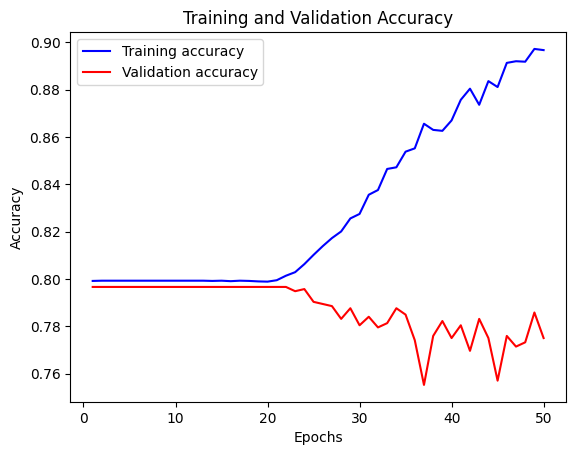

In [16]:
import matplotlib.pyplot as plt
# Extracting training and validation accuracy from history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Creating an array of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plotting the training and validation accuracy
plt.plot(epochs, training_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Model Save

In [17]:
model.save('CNN-Dogage_Function04.h5')


# loss  plot with epochs

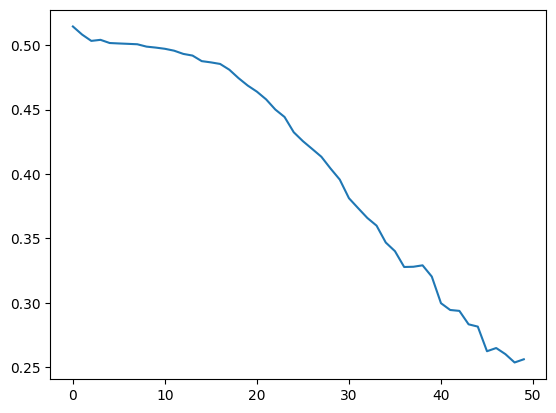

In [18]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

## Model performance validation with testing data 

In [19]:
print(model.evaluate(test_data,test_target))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7614 - loss: 1.0745
[1.0088510513305664, 0.7749775052070618]
